<h1>Basic Potentials used in Molecular Dynamics Symulations</h1>
<p>
    This notebook contains implementations of different MD potentials
</p>
<p>
    @Version 1.0 <br>
    @Author Marc
</p>

In [4]:
# Imports
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as nconst
import rdkit.Chem as RDKitChem
import rdkit.Chem.AllChem as RDKitAllChem

In [5]:
# Part 0: global functions and variables

# 0.1 Global variables

# 0.2 Reduced mass
def reduced_mass(mass1, mass2):
    return ((mass1 * mass2) / (mass1 + mass2))

# 0.3 U_m
def u_m(alpha_a, alpha_b, N_a, N_b):
        return ((alpha_a * alpha_b) / ((math.sqrt(alpha_a / N_a)) + (math.sqrt(alpha_b / N_b))))
    
# 0.4 Equillibrium distance r_m
def r_m(r_0):
    return r_0 * 2**(-6)

In [6]:
# Part 1: two particle potentials

# 1.1 Lennard-Jones potential
def v_lennard_jones(r, rm, e_min, alpha_a, alpha_b, N_a, N_b):
    # u = u_m(alpha_a, alpha_b, N_a, N_b) * ((r_m / r)**12 - (2*(r_m / r)**6))
    a = 4 * e_min * rm**12
    b = 4 * e_min * rm**6
    u = ((a / r**12) - (b / r**6))
    return u

# 1.2 Coulomb potential
def v_coulomb(r, z_a, z_b, dieclectricity_constant):
    return ((z_a * z_b * nconst.e**2) / (4 * nconst.pi * nconst.epsilon_0 * dieclectricity_constant * r))

# 1.3 Harmonic oscillator
def v_ho(r, r_m, mass_a, mass_b, frequency):
    h = frequency**2 * reduced_mass(mass_a, mass_b)
    return 0.5 * h * (r - r_m)**2

# 1.4 Morse potential
def v_morse(r, r_m, e_dissociation, alpha):
    return (e_dissociation * (1 - math.exp(-1 * alpha * (r - r_m)))**2)

<h2>Visualisations</h2>
<p>
    Example plots for the different potential functions implemented above.
    <br>
    Some general information:
    <ul>
        <li>Covalent bond potentials are plotted for the dihydrogen (H<sub>2</sub>) system</li>
        <li>Non-covalent interactions were plotted for the HCl (H<sup>+</sup> + Cl<sup>-</sup>) system</li>
    </ul>
</p>

In [7]:
# General visualisation algorithms
plot_x_count = 50

def plot_potential(x_data, y_data, title):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot(x_data, y_data)
    ax.set_title(title)
    ax.set_xlabel("r")
    ax.set_ylabel("U(r)")
    
    return fig, ax

# Create periodic table
table_of_elements = RDKitChem.GetPeriodicTable()

# Dihydrogen parameters
h2_mol = RDKitAllChem.MolFromSmiles('[H][H]')
hcl_ions = RDKitAllChem.MolFromSmiles('[H+].[Cl-]')

C:\Users\Marc Lucas Appis\AppData\Local\Temp\ipykernel_14112\2351097060.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  u = ((a / r**12) - (b / r**6))
C:\Users\Marc Lucas Appis\AppData\Local\Temp\ipykernel_14112\2351097060.py:8: RuntimeWarning: invalid value encountered in double_scalars
  u = ((a / r**12) - (b / r**6))
C:\Users\Marc Lucas Appis\AppData\Local\Temp\ipykernel_14112\3419682826.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  LJ_plot_fig.show()


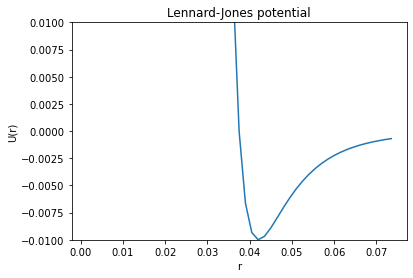

In [8]:
# Lennard-Jones potential
atom1 = h2_mol.GetAtoms()[0].GetAtomicNum()
atom1_valence_electrons = h2_mol.GetAtoms()[0].GetTotalValence()
r_0 = 2 * table_of_elements.GetRvdw(atom1)
rm = r_m(r_0)
r_max = 2 * rm # in
r_min = (0) * rm
alpha = 1e-2 # in Kcal A6/mol

r_plot = np.zeros(plot_x_count)
v_plot = np.zeros(plot_x_count)

for i in range(plot_x_count):
    r_plot[i] = r_min + ((r_max - r_min) * (i / plot_x_count))
    v_plot[i] = v_lennard_jones(r_plot[i], rm, alpha, alpha, alpha, atom1_valence_electrons, atom1_valence_electrons)
    
LJ_plot_fig, LJ_plot_ax = plot_potential(r_plot, v_plot, "Lennard-Jones potential")
LJ_plot_ax.set_ylim(-0.01, 0.01)
LJ_plot_fig.show()

C:\Users\Marc Lucas Appis\AppData\Local\Temp\ipykernel_14112\2351097060.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  return ((z_a * z_b * nconst.e**2) / (4 * nconst.pi * nconst.epsilon_0 * dieclectricity_constant * r))
C:\Users\Marc Lucas Appis\AppData\Local\Temp\ipykernel_14112\3810164542.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  Coulomb_plot_fig.show()


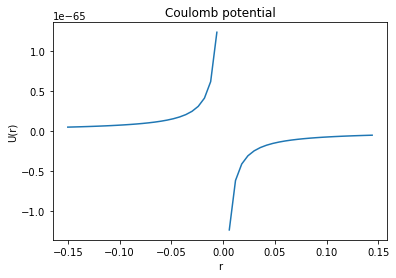

In [9]:
# Coulomb potential
atom1 = hcl_ions.GetAtoms()[0].GetAtomicNum()
atom2 = hcl_ions.GetAtoms()[1].GetAtomicNum()
r_0 = table_of_elements.GetRvdw(atom1) + table_of_elements.GetRvdw(atom1)
rm = r_m(r_0)
r_max = 4 * rm # in
r_min = (-4) * rm
dielectricity_const = 80 # for water
z_a = nconst.elementary_charge
z_b = (-1) * nconst.elementary_charge

r_plot = np.zeros(plot_x_count)
v_plot = np.zeros(plot_x_count)

for i in range(plot_x_count):
    r_plot[i] = r_min + ((r_max - r_min) * (i / plot_x_count))
    v_plot[i] = v_coulomb(r_plot[i], z_a, z_b, dielectricity_const)
    
Coulomb_plot_fig, Coulomb_plot_ax = plot_potential(r_plot, v_plot, "Coulomb potential")
Coulomb_plot_fig.show()

C:\Users\Marc Lucas Appis\AppData\Local\Temp\ipykernel_14112\3978386240.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  HO_plot_fig.show()


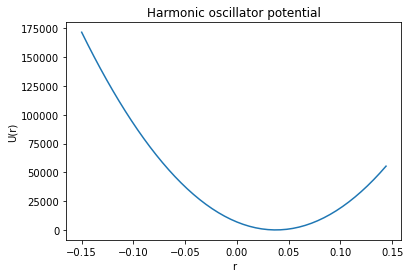

In [10]:
# Harmonic osscilator
atom1 = h2_mol.GetAtoms()[0].GetAtomicNum()
mass1 = table_of_elements.GetAtomicWeight(atom1) # in atomic units
r_0 = 2 * table_of_elements.GetRvdw(atom1)
rm = r_m(r_0)
r_max = 4 * rm # in
r_min = (-4) * rm
frequency = 4401 # in cm^-1

r_plot = np.zeros(plot_x_count)
v_plot = np.zeros(plot_x_count)

for i in range(plot_x_count):
    r_plot[i] = r_min + ((r_max - r_min) * (i / plot_x_count))
    v_plot[i] = v_ho(r_plot[i], rm, mass1, mass1, frequency)
    
HO_plot_fig, HO_plot_ax = plot_potential(r_plot, v_plot, "Harmonic oscillator potential")
HO_plot_fig.show()

C:\Users\Marc Lucas Appis\AppData\Local\Temp\ipykernel_14112\2111294357.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  MO_plot_fig.show()


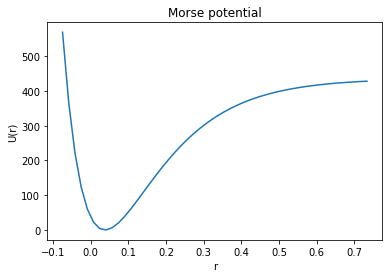

In [11]:
# Morse potential
atom1 = h2_mol.GetAtoms()[0].GetAtomicNum()
r_0 = 2 * table_of_elements.GetRvdw(atom1)
rm = r_m(r_0)
r_max = 20 * rm # in
r_min = (-2) * rm
e_dissociation = 436 # kJ/mol
ke = 40000
alpha = math.sqrt(ke / (2 *e_dissociation ))

for i in range(plot_x_count):
    r_plot[i] = r_min + ((r_max - r_min) * (i / plot_x_count))
    v_plot[i] = v_morse(r_plot[i], rm, e_dissociation, alpha)
    
MO_plot_fig, MO_plot_ax = plot_potential(r_plot, v_plot, "Morse potential")
MO_plot_fig.show()

In [12]:
# Test area
x = math.sqrt(4)
print(h2_mol.GetAtomWithIdx(0).GetTotalValence())

1
